Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn

Importing packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from math import exp
from numpy import mean
import warnings
warnings.filterwarnings("ignore")
from numpy import inf
from mpmath import mp
import matplotlib.pyplot as plt

Creating custom dataset

In [ ]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

Splitting data into train and test

In [ ]:
#please don't change random state
# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

SGD classifier

In [ ]:
# alpha : float
# Constant that multiplies the regularization term.

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

Implement Logistic Regression with L2 regularization Using SGD: without using sklearn


Initialize weights

In [ ]:
#initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
#initialize bias to zero

def initialize_weights(row_vector):
  if len(row_vector.shape) == 1:
    w = np.zeros(row_vector.shape[0])
  else:
    w = np.zeros(row_vector.shape[1])
  b = 0
  return w,b

Compute sigmoid

In [ ]:
# compute sigmoid(z) and return

def sigmoid(z):
  if type(z) == list or isinstance(z,np.ndarray):
    return np.array([1/(1+ float(mp.exp(-i))) for i in z])
  else:
    return 1/(1+ float(mp.exp(-z)))

Compute loss

In [ ]:
# Define a function to calculate log loss.
def logloss(y_true,y_pred):
  if type(y_true) == list or isinstance(y_true,np.ndarray):
    n = len(y_true)
  else:
    n = 1
  loss = (-1 * (1/n) * (np.dot(np.array(y_true), np.array([0 if np.log10(m) == -inf else np.log10(m) for m in np.array(y_pred)]) ) + np.dot((1 - np.array(y_true)), np.array([0 if np.log10(1 - m) == -inf else np.log10(1 - m) for m in np.array(y_pred)]) )))
  return loss

Compute gradient w.r.to  'w'

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
  dw = np.dot(np.array(x), np.array((y - sigmoid(float((np.dot(np.array(w.transpose()), np.array(x))) + b))))) - np.dot(np.array(( alpha * ( 1 / N))), np.array(w))
  return dw

Compute gradient w.r.to 'b'

In [ ]:
def gradient_db(x,y,w,b):
  db = y - sigmoid(float((np.dot(np.array(w.transpose()), np.array(x))) + b))
  return db

In [ ]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
  N = len(X)
  predict = []
  for i in range(N):
      z=np.dot(w,X[i])+b
      predict.append(sigmoid(z))
  return np.array(predict)

Implementing logistic regression

In [ ]:
# In this function, we will implement logistic regression.
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    train_loss = []
    mean_train_loss = []
    test_loss = []
    mean_test_loss = []
    y_pred_train = []
    y_pred_test = []
    w,b = initialize_weights(X_train[0])
    N = len(X_train)
    M = len(X_test)
    h = 0
    while True:
      if h == epochs:
        break
      for i in range(N):
        w += eta0 * gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
        b += eta0 * gradient_db(X_train[i],y_train[i],w,b)
        y_pred_train.append(pred(w,b, [X_train[i]]))
        train_loss.append(logloss(y_train[i],y_pred_train[i]))
      for j in range(M):
        y_pred_test.append(pred(w,b, [X_train[j]]))
        test_loss.append(logloss(y_test[j],y_pred_test[j]))
      mean_train_loss.append(mean(train_loss))
      mean_test_loss.append(mean(test_loss))
      print('Epoch: {}   Train loss: {}   Test loss: {}'.format(h+1,mean(mean_train_loss), mean(mean_test_loss)))
      # if (h>0) and ((abs(mean_train_loss[h] - mean_train_loss[h-1]) < 0.005) or (h == epochs)):
      h += 1
      train_loss = []
      test_loss = []
    return w,b,mean_train_loss,mean_test_loss

In [ ]:
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

Epoch: 1   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 2   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 3   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 4   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 5   Train loss: 0.16485730442340443   Test loss: 0.42264641495854355
Epoch: 6   Train loss: 0.16485730442340443   Test loss: 0.42264641495854355
Epoch: 7   Train loss: 0.16485730442340443   Test loss: 0.4226464149585435
Epoch: 8   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 9   Train loss: 0.16485730442340443   Test loss: 0.4226464149585436
Epoch: 10   Train loss: 0.16485730442340446   Test loss: 0.42264641495854355
Epoch: 11   Train loss: 0.16485730442340446   Test loss: 0.42264641495854355
Epoch: 12   Train loss: 0.16485730442340446   Test loss: 0.42264641495854355
Epoch: 13   Train loss: 0.16485730442340446   Test loss: 0.4226464149585435
Epoch: 14   Trai

In [ ]:
print(w)
print(b)

[-0.4136237   0.19233564 -0.14998795  0.3264539  -0.22464057  0.58627918
 -0.42724728 -0.10046785  0.21459147  0.15533582  0.17859096 -0.01289335
 -0.06476848  0.36319524 -0.00993009]
-0.8978925579469353


In [ ]:
print(clf.coef_)
print(clf.intercept_)
clf.coef_.shape

[[-0.42336692  0.18547565 -0.14859036  0.34144407 -0.2081867   0.56016579
  -0.45242483 -0.09408813  0.2092732   0.18084126  0.19705191  0.00421916
  -0.0796037   0.33852802  0.02266721]]
[-0.8531383]


(1, 15)

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

Plot train and test loss vs epochs

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

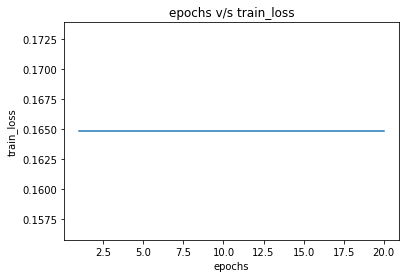

In [ ]:
plt.plot(list(range(1,epochs+1)),train_loss)
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.title('epochs v/s train_loss')
plt.show()